In [12]:
import pandas as np
data=np.read_csv("/content/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Diabetespedigreefunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabetespedigreefunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Diabetespedigreefunction  Age  Outcome  
0                       0.627   50        1  
1                  

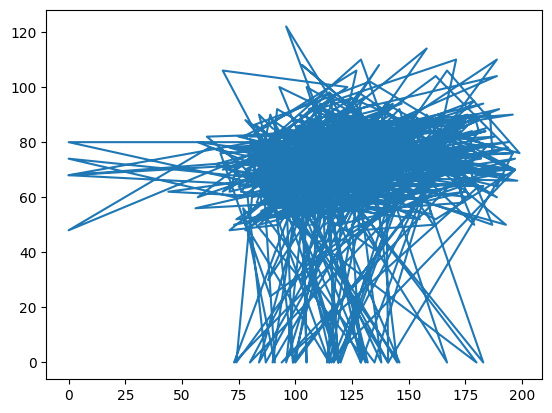

In [15]:
from matplotlib import pyplot as plt
plt.plot(data["Glucose"],data["BloodPressure"])

In [16]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.20)
print(xtrain)
print(ytrain)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
365            5       99             54             28       83  34.0   
118            4       97             60             23        0  28.2   
533            6       91              0              0        0  29.8   
636            5      104             74              0        0  28.8   
307            0      137             68             14      148  24.8   
..           ...      ...            ...            ...      ...   ...   
703            2      129              0              0        0  38.5   
193           11      135              0              0        0  52.3   
509            8      120             78              0        0  25.0   
397            0      131             66             40        0  34.3   
153            1      153             82             42      485  40.6   

     Diabetespedigreefunction  Age  
365                     0.499   30  
118                     0.443   22  


In [18]:
from sklearn.linear_model import LogisticRegression
be=LogisticRegression()
be.fit(xtrain,ytrain)
ypred=be.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
c=be.predict([[3,164,66,24,18,27.09,0.288,45]])
print("outcome :",c)

outcome : [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[356  46]
 [103 110]]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.7577235772357723


In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       402
           1       0.71      0.52      0.60       213

    accuracy                           0.76       615
   macro avg       0.74      0.70      0.71       615
weighted avg       0.75      0.76      0.75       615

